<a href="https://colab.research.google.com/github/TabithaWKariuki/Finacial-Inclusion-in-East-Africa/blob/main/%22Moringa_Data_Science_Core_W2_Independent_Project_2022_05_Tabitha_Kariuki_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINANCIAL INCLUSION IN EAST AFRICA

Financial inclusion refers to a process by which individuals or businesses can access appropriate, affordable, and timely financial products and services. These include banking, loan, equity, and insurance products.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> How we can predict which individuals are most likely to have or use a bank account?

### b) Defining the Metric for Success

In order to work on the above problem, I will need to do the following:

1. Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
2. Implement the solution by performing the Linear Discriminant Analysis.
3. Challenge the solution by providing insights on how you can make improvements.

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

1. Obtaining dataset for our study 
2. Importing all the necessary libraries for data analysis. 
3. Loading and viewing our data to better understand it.
4. Finding and dealing with anomalies, outliers, missing values, and other unnecessary data within our dataset. 
5. Conducting our analysis by starting with univariate analysis, followed by bivariate and lastly multivariate analysis. 
6. We can then implement our solution. 
7. Finally, challenge the solution by providing recommendations on ways to improve.

### e) Data Relevance

All the data provided will help us analyze or predict which individulas are most likely to own a bank account. The data provided aligns with the context of our study. The datafiles are as follows;
Variable Definitions: http://bit.ly/VariableDefinitions 
Dataset: http://bit.ly/FinancialDataset 

## 2. Reading the Data

In [10]:
# Importing the libraries
#

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

In [11]:
# Loading the Data from the source.
# Financial Dataset url: http://bit.ly/FinancialDataset

finance=pd.read_csv('http://bit.ly/FinancialDataset')

In [12]:
# Loading the variable definition data
# Variable Definitions url: http://bit.ly/VariableDefinitions

variableDEF=pd.read_csv('http://bit.ly/VariableDefinitions')

## 3. Checking the Data

In [ ]:
# Previewing the variable definitions dataset
#
variableDEF

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Determining the no. of records in our dataset
#

finance.shape

(23524, 13)

Our dataset has 23524 rows and 13 columns.


In [ ]:
# Previewing the top of our dataset
#

finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
# 

finance.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# checking the general information of our dataframe
#

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Checking whether each column has an appropriate datatype
#

finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# Checking our column fields.

finance.columns.values.tolist()

['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

In [ ]:
# Finding the summary statitics of our dataframe

finance.describe()

# This line of code only selects the continous variables only

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Finding the summary statistics of all variables in the dataframe

finance.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 

### a.Validation

## 5. Tidying the Dataset

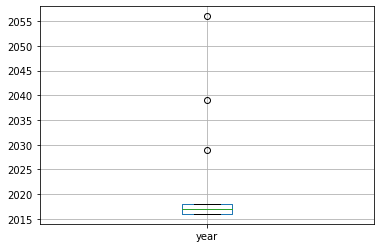

In [ ]:
# Checking for Outliers in our data
#

finance.boxplot(['year'])

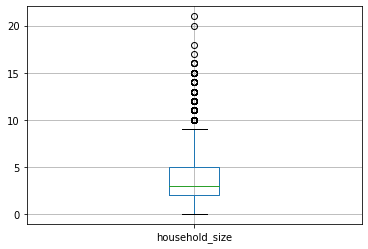

In [ ]:
# Checking outliers in our household size variable

finance.boxplot(['household_size'])

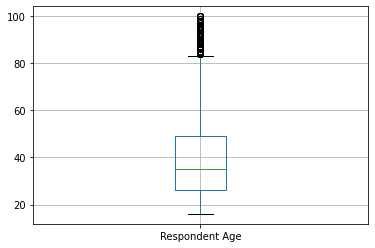

In [ ]:
# Checking outliers in our respondent age variable.

finance.boxplot(['Respondent Age'],)

There are outliers in all the 3 continuous variables: year, household_size and respondent age. We will therefore remove them as they will affect our analysis.

In [6]:
# Checking for Anomalies
#

Q1 = finance.quantile(0.25)
Q3 = finance.quantile(0.75)

print(Q1)
print(Q3)

IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

print('Lower_Bound' +str(lower_bound))
print('Upper_Bound' +str(upper_bound))

year              2016.0
household_size       2.0
Respondent Age      26.0
Name: 0.25, dtype: float64
year              2018.0
household_size       5.0
Respondent Age      49.0
Name: 0.75, dtype: float64
year               2.0
household_size     3.0
Respondent Age    23.0
dtype: float64
Lower_Boundyear              2013.0
household_size      -2.5
Respondent Age      -8.5
dtype: float64
Upper_Boundyear              2021.0
household_size       9.5
Respondent Age      83.5
dtype: float64


In [7]:
# Dealing and removing outliers

NEWfinance = finance[~((finance < (Q1 - 1.5 * IQR)) |(finance > (Q3 + 1.5 * IQR))).any(axis=1)]

NEWfinance.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(22903, 13)

After dealing with the outliers we remain with 22903 rows. This is a small reduction and therefore I choose to use the new data as outlier greatly affect the measuresof central tendency.

In [ ]:
# Identifying the Missing Data
#
NEWfinance.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

All fields have missing values except the year and uniquedid columns.

In [57]:
# Dealing with the Missing Data
# The following lines of codes are meant to repalce missing values with mean for continous variables and mode for categorical variables.

NEWfinance['country'].fillna(NEWfinance['country'].mode()[0], inplace=True)
NEWfinance['Has a Bank account'].fillna(NEWfinance['Has a Bank account'].mode()[0], inplace=True)
NEWfinance['Type of Location'].fillna(NEWfinance['Type of Location'].mode()[0], inplace=True)
NEWfinance['Cell Phone Access'].fillna(NEWfinance['Cell Phone Access'].mode()[0], inplace=True)
NEWfinance['household_size'].fillna(NEWfinance['household_size'].mean(), inplace=True)
NEWfinance['Respondent Age'].fillna(NEWfinance['Respondent Age'].mean(), inplace=True)
NEWfinance['gender_of_respondent'].fillna(NEWfinance['gender_of_respondent'].mode()[0], inplace=True)
NEWfinance['The relathip with head'].fillna(NEWfinance['The relathip with head'].mode()[0], inplace=True)
NEWfinance['marital_status'].fillna(NEWfinance['marital_status'].mode()[0], inplace=True)
NEWfinance['Level of Educuation'].fillna(NEWfinance['Level of Educuation'].mode()[0], inplace=True)
NEWfinance['Type of Job'].fillna(NEWfinance['Type of Job'].mode()[0], inplace=True)

In [58]:
# Checking for missing data after dealing with missing values
#

NEWfinance.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
# Checking for duplicates
#
NEWfinance.duplicated().sum()

0

There is no dulicated data.

In [8]:
# we use the to_csv function to create a csv file with the name example 
# and export it
#

NEWfinance.to_csv('financeEA.csv')

In [13]:
# Loading and reading the data from our CSV
# Creating a new dataframe df1 and checking its shape

financeEA=pd.read_csv('financeEA.csv')

financeEA.shape

(22903, 14)

## 6. Exploratory Analysis

## Univariate Analysis

Categorical Variable
1. Frequency Tables
2. Bar charts and Histograms
3. Pie charts

In [ ]:
# Frequencies of gender of respondents.

financeEA['gender_of_respondent'].value_counts()

Female    13521
Male       9382
Name: gender_of_respondent, dtype: int64

In [ ]:
# frequencies of cell phone access

financeEA['Cell Phone Access'].value_counts()

Yes    17110
No      5793
Name: Cell Phone Access, dtype: int64

In [ ]:
# frequencies of 'has a bank account'

financeEA['Has a Bank account'].value_counts()

No     19656
Yes     3247
Name: Has a Bank account, dtype: int64

In [ ]:
# frequencies of 'level of education'

financeEA['Level of Educuation'].value_counts()

Primary education                  12556
No formal education                 4270
Secondary education                 4113
Tertiary education                  1146
Vocational/Specialised training      787
6                                     25
Other/Dont know/RTA                    6
Name: Level of Educuation, dtype: int64

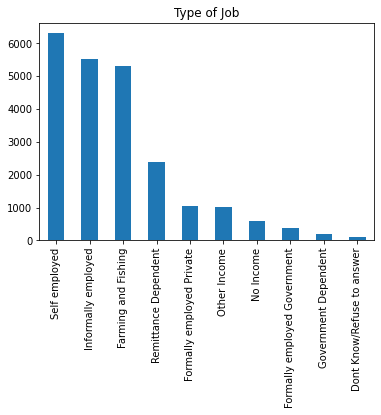

In [ ]:
# plotting a bar chart for 'type of job'

financeEA['Type of Job'].value_counts().plot.bar(title='Type of Job')


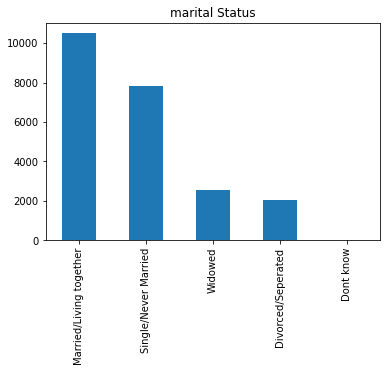

In [ ]:
# plotting bar chart for 'marital status'

financeEA['marital_status'].value_counts().plot.bar(title='marital Status')

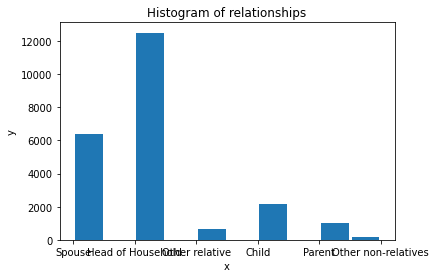

In [ ]:
# Plotting a histogram for 'relationship with head'

relations=financeEA['The relathip with head']

plt.hist(relations, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Histogram of relationships')
plt.show()

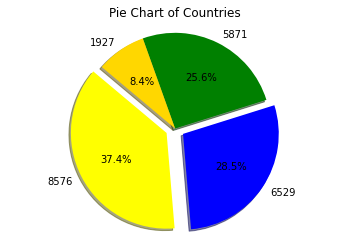

In [ ]:
# Plotting a pie chart for the country

# Defining our labels, sizes, colors and explode 
countries = financeEA['country'].value_counts()
colors = ['yellow', 'blue', 'green', 'gold']

# Highlights a particular Value in plot
explode = (0.1, 0.1, 0, 0)  

# Plotting our pie chart
plt.pie(countries, explode=explode, labels=countries, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Pie Chart of Countries')
plt.show()

Numerical Variables

Measures of central tendency
1. Mean
2. Mode 
3. Median

Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number which can estimate the value of whole data set.

In [ ]:
# finding mean of household size

financeEA['household_size'].mean()

3.5733956985486985

In [ ]:
# finding mean of respondents age

financeEA['Respondent Age'].mean()

38.345080891998215

Mode is the term appearing maximum time in data set i.e. term that has highest frequency.

In [ ]:
# finding mode of household size

financeEA['household_size'].mode()

0    2.0
dtype: float64

In [ ]:
# finding mode of respondents age

financeEA['Respondent Age'].mode()

0    30.0
dtype: float64

Median is the value which divides the data in 2 equal parts i.e. number of terms on right side of it is same as number of terms on left side of it when data is arranged in either ascending or descending order.

In [ ]:
# finding the median age of respondents

financeEA['Respondent Age'].median()

35.0

In [ ]:
# finding the median household size

financeEA['household_size'].median()

3.0

Measures of Dispersion

1.Standard Deviation
2.Variance
3.Range
4.Skewness
5.Quantiles
6.Kurtosis

Standard deviation (SD) is the measurement of average distance between each quantity and mean.

In [ ]:
# finding the SD of repondents age

financeEA['Respondent Age'].std()

# The respondents age are more spread out from the mean 

15.792632474845702

In [ ]:
# finding the SD of household size 

financeEA['household_size'].std()

# The household size data is close to its mean

2.078556853919515

Variance is a square of average distance between each quantity and mean. 
That is it is square of standard deviation. It is a measure of how dispersed or spread out the set is, 

In [ ]:
# finding the variance of household size

financeEA['household_size'].var()

# the household size variable is close to the mean and the numbers are close to each other 

4.320398594975792

In [ ]:
# finding variance of respondents age

financeEA['Respondent Age'].var()

# the respondents ages are further spread out from the mean and the numbers are not as close to each as those with a lower varaince

249.40724048555106

Range is the difference between lowest and highest value.

In [ ]:
# Finding the min and max values of the household size variable

financeEA_max = financeEA['household_size'].max()
financeEA_min = financeEA['household_size'].min()

# Calculating the range
financeEA_max - financeEA_min

9.0

In [ ]:
# Finding the min and max values of the year variable

financeEA_max = financeEA['Respondent Age'].max()
financeEA_min = financeEA['Respondent Age'].min()

# Calculating the range
financeEA_max - financeEA_min

67.0

Skewness is a measure of the asymmetry of the probability distribution 
of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.

In [ ]:
# determining skewness of household size

financeEA['household_size'].skew()

# the household size data is positely skewed and equal to o meaning a normal distribution is assumed.

0.6110930989257479

In [ ]:
# determining the skewness of the respondents age

financeEA['Respondent Age'].skew()

# the respondents age data is positive skewed and equal to 0 meaning a normal distribution is assumed

0.7415098242614647

Quartiles are values that divide your data into quarters provided data is sorted in an ascending order. There are three quartile values.
First quartile value is at 25 percentile. Second quartile is 50 percentile and third quartile is 75 percentile. 
Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. Third Quartile (Q3) is median of lower half of the data.

In [ ]:
# finding the quatiles of household size

financeEA['household_size'].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# finding the quatiles of the respondents age

financeEA['Respondent Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed (lack of outliers) relative to a normal distribution.

In [ ]:
# determining the kurtosis of household size

financeEA['household_size'].kurt()

# the kurtosis is less than zero, then the distribution is light tailed resulting in fewer extreme positive or negative events.

-0.49635260958004856

In [ ]:
# determining the kurtosis of respondents age

financeEA['Respondent Age'].kurt()

# the kurtosis is less than zero, then the distribution is light tailed resulting in fewer extreme positive or negative events.

-0.2323574017276666

##Bivariate Analysis

Numerical Data

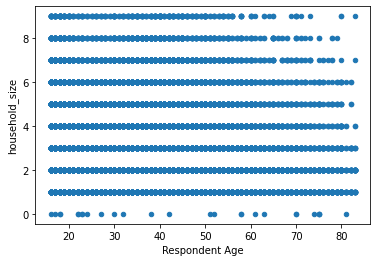

In [ ]:
# Using Pandas Plotting our scatterplot to compare the variables

financeEA.plot(x = 'Respondent Age', y ='household_size' , kind='scatter')

# The scatter plot shows there's no correlation between the ages of the respondents and the household size.

In [ ]:
# Calculating the pearson correlation coefficient

coeff = financeEA['Respondent Age'].corr(financeEA['household_size']) 

print(coeff)

# There is a inverse correlation between age of respondents and the household size
# this means when the respondents age increases the households size decreases and viceversa

-0.10623942590329913


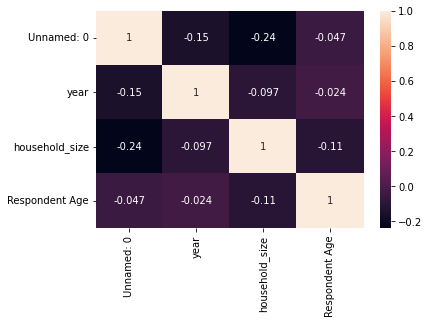

In [ ]:
# generating a heatmap for the numerical variables

sns.heatmap(financeEA.corr(),annot=True)
plt.show()

Categorical Data

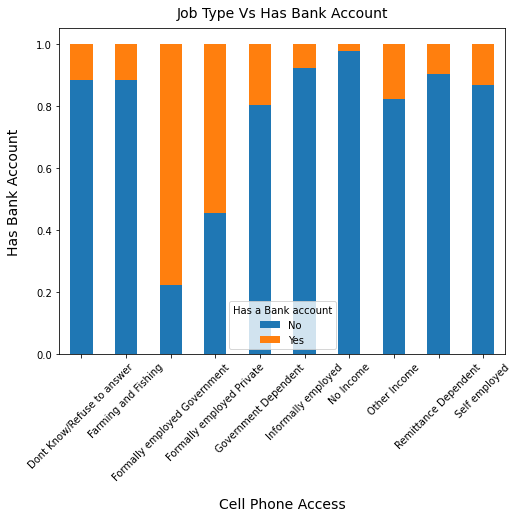

In [ ]:
country = financeEA.groupby('Type of Job')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Job Type Vs Has Bank Account', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Cell Phone Access', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Most Individuals doing farming and fishing have bank accounts. Almost all individuals with no income have no bank Accounts.

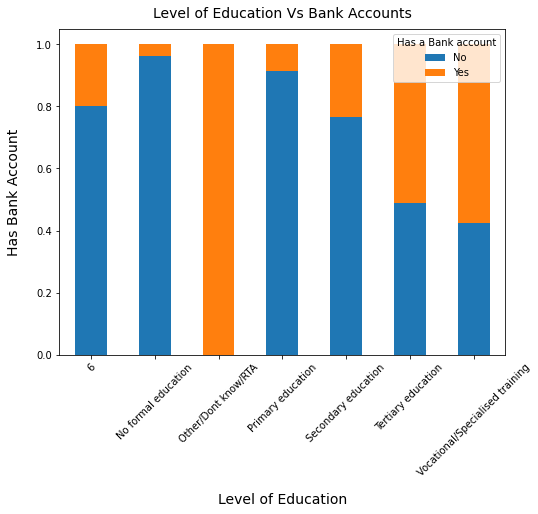

In [ ]:
country = financeEA.groupby('Level of Educuation')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Level of Education Vs Bank Accounts', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Level of Education', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Individuals with no formal education have no bank accounts whereas those with vocational/spcialised training are more likely to have bank accounts.

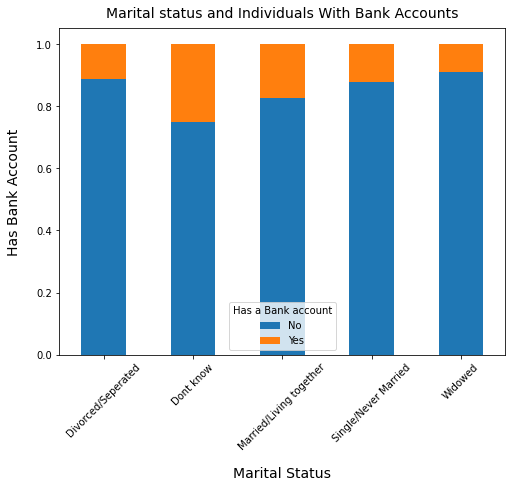

In [ ]:
country = financeEA.groupby('marital_status')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Marital status and Individuals With Bank Accounts', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Marital Status', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Those with no/don't know their marital status have more bank accounts as compared to the other groups.

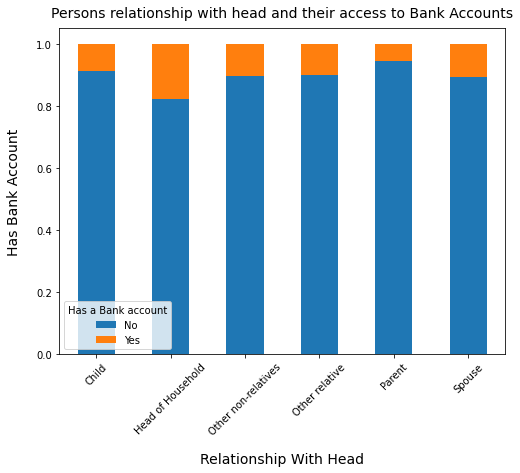

In [ ]:
country = financeEA.groupby('The relathip with head')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Persons relationship with head and their access to Bank Accounts', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Relationship With Head', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Among the individuals in households the head of households is most likely to have a bank account.

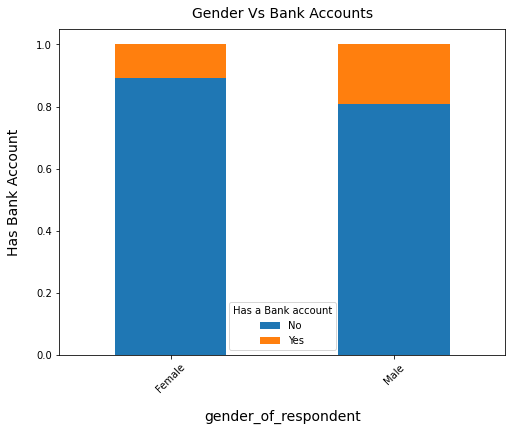

In [ ]:
country = financeEA.groupby('gender_of_respondent')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Gender Vs Bank Accounts', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('gender_of_respondent', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

The male gender own more bank accounts compared to their female counterparts

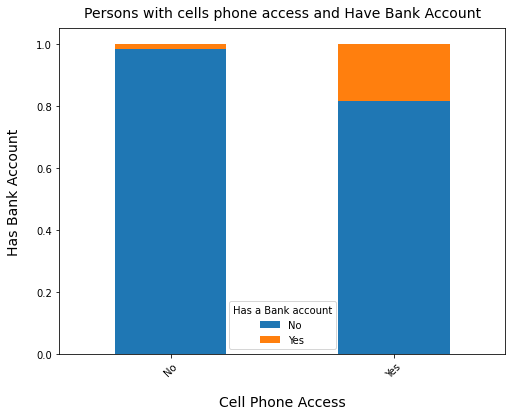

In [ ]:
country = financeEA.groupby('Cell Phone Access')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Persons with cells phone access and Have Bank Account', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Cell Phone Access', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Individuals with cell phone access are more like;y to own a bank account compared to the individual with no access to a cell phone

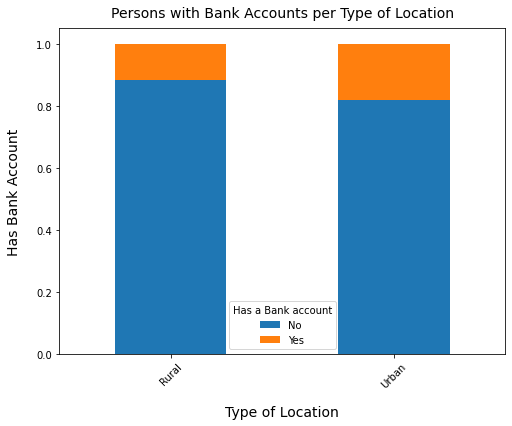

In [ ]:
country = financeEA.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Persons with Bank Accounts per Type of Location', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Type of Location', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Most individuals in the urban areas have bank accounts as compared to the rural setup. The ownership of bank accounts in both locations is still low.

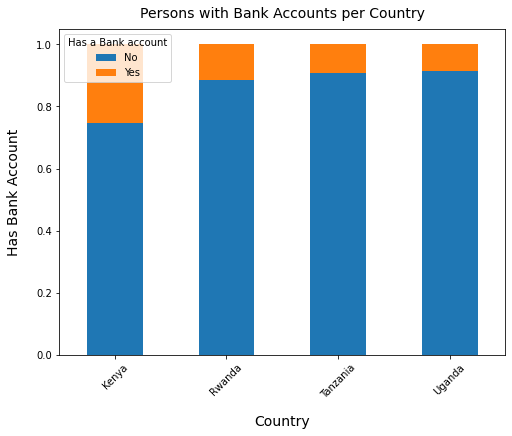

In [ ]:
country = financeEA.groupby('country')['Has a Bank account'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title('Persons with Bank Accounts per Country', fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel('Has Bank Account', fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel('Country', fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

Kenya has the highest number of individuals who have bank accounts, closely followed by Rwanda.

## Multivariate Analysis

In [76]:
# we then import label encoder to convert our categorical data into numbers 

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

financeEA['country']=lb.fit_transform(financeEA['country'].astype(str))
financeEA['Type of Location']=lb.fit_transform(financeEA['Type of Location'].astype(str))
financeEA['Cell Phone Access']=lb.fit_transform(financeEA['Cell Phone Access'].astype(str))
financeEA['gender_of_respondent']=lb.fit_transform(financeEA['gender_of_respondent'].astype(str))
financeEA['The relathip with head']=lb.fit_transform(financeEA['The relathip with head'].astype(str))
financeEA['marital_status']=lb.fit_transform(financeEA['marital_status'].astype(str))
financeEA['Level of Educuation']=lb.fit_transform(financeEA['Level of Educuation'].astype(str))
financeEA['Type of Job']=lb.fit_transform(financeEA['Type of Job'].astype(str))

financeEA.head(3)

,Unnamed: 0,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,0,0,2018,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,4,9
1,1,0,2018,uniqueid_2,No,0,0,5.0,70.0,0,1,4,1,4
2,2,0,2018,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,6,9


In [74]:
# dividing dataset into features and corresponding labels 
# and then divide the resultant dataset into training and test sets. 

X = financeEA.iloc[:, 0:4].values
y = financeEA.iloc[:, 4].values

In [52]:
# dividing the data into training and test sets
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
# performing feature scaling.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# Getting rid of the infinite values

financeEA.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Perfroming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

## 7. Challenging the solution

The prediction method used here was Linear Discriminant Analysis.

## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

We had the right data that covered the most important factors that explain financial inclusion in East Africa.


### b). Do we need other data to answer our question?

The datasets provided were sufficient for our analysis and they answered our problem.

### c). Did we have the right question?

Yes and from our analysis we've found that individuals who are likely to have bank accounts have the following factors; 
1. Are of the male gender
2. Have farming and fishing as the main job type
3. Have vocational/specialised training as the most common level of education
4. Living in urban area
5. They are the head of their families
6. And they dont know their marital status.
7. They most likely live in Kenya